<a href="https://colab.research.google.com/github/QamarSabra/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales 💼📊

- Authors ✍️: Qamar and Fooz

## Project Overview ✨

Welcome to our portfolio project! This project is designed to demonstrate our data science skills through the exploration and analysis of a sales dataset. You’ll find a step-by-step breakdown of the entire process, from loading and cleaning the data to performing in-depth analysis. Let’s dive in!
For now, let's start with an overview of the dataset:
___

### 📋 Feature Dictionary

| Feature | Description | Example |
|---------|-------------|---------|
| Item_Identifier | Unique product ID 🛒 | FDA15|
| Item_Weight | Weight of the product in kilograms ⚖️ | 9.30 |
| Item_Fat_Content | Whether the product is Low Fat or Regular 🥛 | Low Fat|
| Item_Visibility | The percentage of the product’s visibility in the store 📊| 0.016047 |
| Item_Type | The category of the product (e.g., Dairy, Soft Drinks, Household) 🍞 | Dairy |
| Item_MRP | Maximum Retail Price (MRP) of the product in local currency 💰 | 249.8092 |
| Outlet_Identifier | Unique store ID 🏬 | OUT049 |
| Outlet_Establishment_Year | The year the store was established 🗓️ | 1999 |
| Outlet_Size | Size of the store (Small, Medium, High) 🏠 | Medium |
| Outlet_Location_Type | The location type of the store (Tier 1, Tier 2, Tier 3) | Tier 1 |
| Outlet_Type | Type of store (e.g., Grocery Store, Supermarket Type1) 🛒 | Supermarket Type1 |
| Item_Outlet_Sales | Total sales of the product in that particular store (Target variable) 💸 | 3735.1380 |

___
What You’ll Find in This Colab Notebook 📑
- Load and Inspect Data: Loading the dataset and performing an initial inspection of the data. 🔍
- Clean Data: Handling missing values, correcting data types, and ensuring the dataset is ready for analysis. 🧼✨
- Exploratory Data Analysis (EDA): Visualizing and summarizing the data to uncover key patterns and trends. 📊🔍
- Feature Inspection: Examining the features and understanding their role in predicting the target variable. 🛠️👀
___
Let’s get started! 🚀

## Load and Inspect Data  🔍

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode


In [ ]:
# Qamar path
fpath = '/content/drive/MyDrive/sales_predictions_2023.csv'

# Fooz path
#fpath = '/content/drive/MyDrive/Colab Notebooks/Projects/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Q1) How many rows and columns?

In [ ]:
df_sales.shape

(8523, 12)

## Q2) What are the datatypes of each variable?

In [ ]:
# check the data type for each column
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data 🧼✨

## Q3) Are there duplicates? If so, drop any duplicates

In [ ]:
# check if there is any duplicate
df_sales.duplicated().sum()

0

## Q4) Identify missing values.

In [ ]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## 5) Address the missing values by using a placeholder value.

In [ ]:
df_sales['Item_Weight'].dtype

dtype('float64')

In [ ]:
# check the summary statistics for the item_weight column
df_sales['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [ ]:
# fill the missing values for the Item Weight column with the mean value
weight_mean = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(weight_mean)

In [ ]:
# make sure that there is no missing value for the Item_weight column
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# check the data type of column Outlet_Size
df_sales['Outlet_Size'].dtype

dtype('O')

In [ ]:
# check the values to determine the most repeated value
df_sales['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df_sales['Outlet_Size'].head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High


In [ ]:
# check the mode for the categorical coulmn
size_mode = mode(df_sales['Outlet_Size'])

In [ ]:
# fill the empty values with the mode 'Medium'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(size_mode)

## 6) Confirm that there are no missing values after addressing them.

In [ ]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


## 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
# get the object columns names
str_cols = df_sales.select_dtypes("object").columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# check the value count for each column
for col in str_cols:
  print(df_sales[col].value_counts())
  print('__________ \n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
__________ 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
__________ 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
__________ 

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT0

In [ ]:
# we need to fix the Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# replace the 'LF' and 'low fat' with 'Low Fat'
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,2889
reg,117


In [ ]:
# replace the 'rg' with 'Regular'
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis 📊🔍

In [ ]:
num_cols= df_sales.select_dtypes('number').columns
num_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# annotate histogram plot
def annotated_hist(df, col):
  # calculate the mean
  mean= df[col].mean().round(2)
  # calculate the median
  median= df[col].median().round(2)

  # plot by usin seaborn using histplot function
  fig, ax= plt.subplots(figsize= (10, 8))
  ax= sns.histplot(data= df, x= col)

  ax.axvline(mean, color= 'red', label= f'Mean is {mean}', lw= 2)
  ax.axvline(median, color= 'green', label= f'Median is {median}', lw= 2, ls= ':')

  ax.set_title(f'Distribution of {col}')
  ax.legend()

  return fig, ax

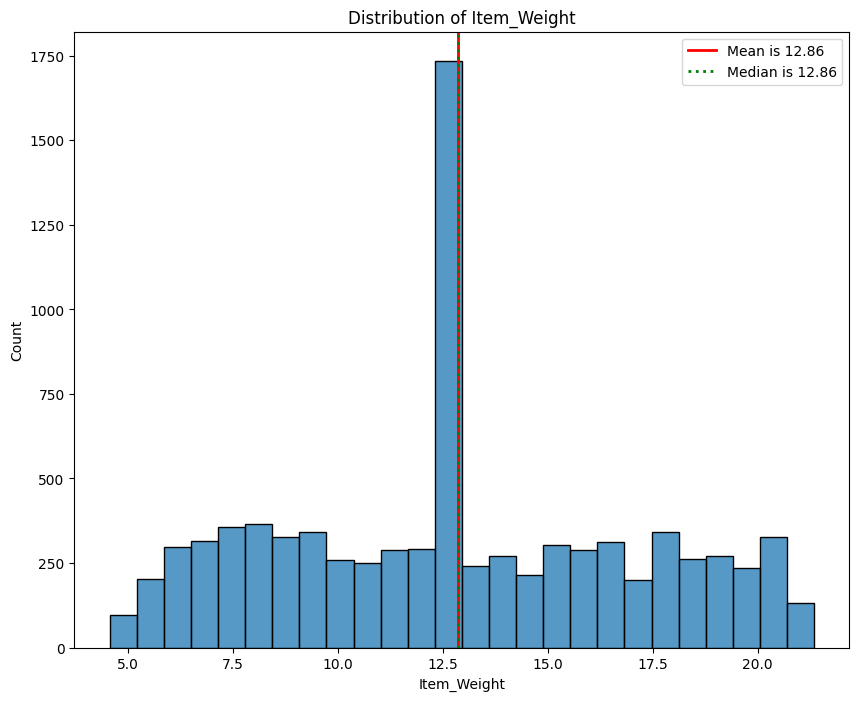

In [ ]:
# plot the histogram for Item_Weight feature
fig, ax= annotated_hist(df_sales, 'Item_Weight')

## comment  the plot:

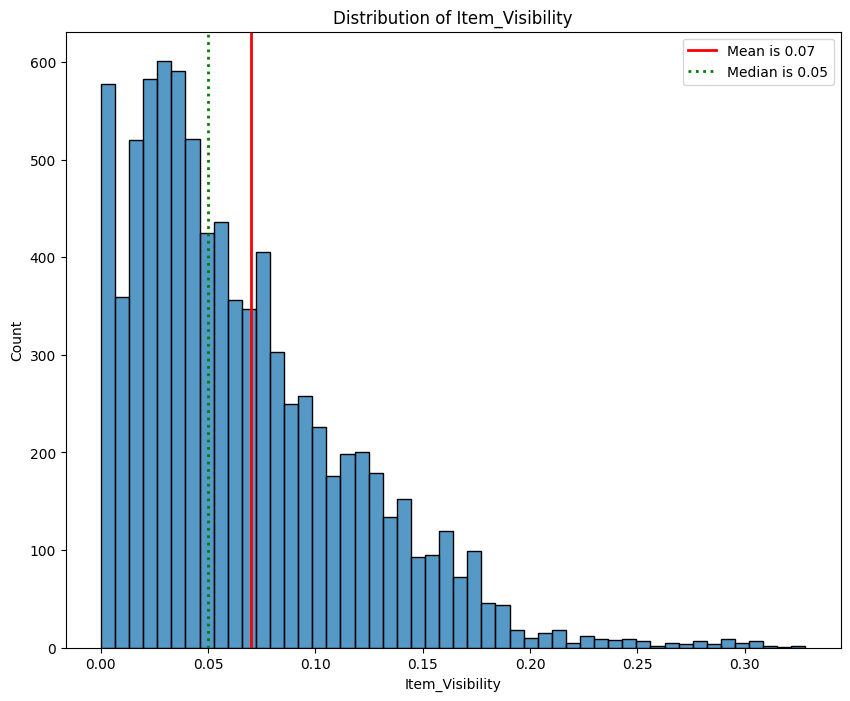

In [ ]:
# plot the histogram for Item_Visibility feature
fig, ax= annotated_hist(df_sales, 'Item_Visibility')

## comment on the plot:

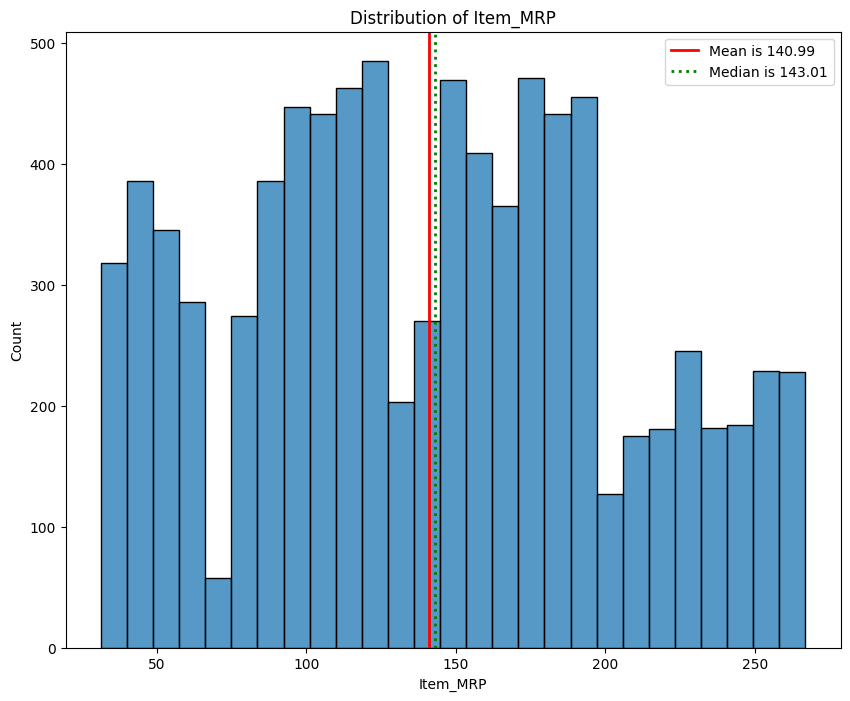

In [ ]:
# plot the histogram for Item_MRP feature
fig, ax= annotated_hist(df_sales, 'Item_MRP')

## comment on the plot:

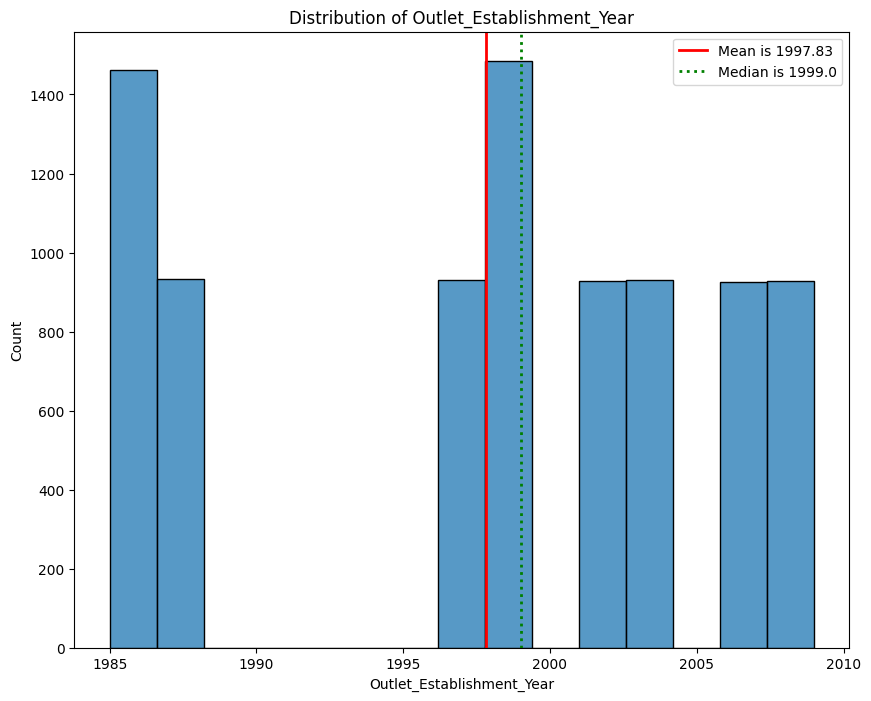

In [ ]:
# plot the histogram for Outlet_Establishment_Year feature
fig, ax= annotated_hist(df_sales, 'Outlet_Establishment_Year')

## comment on the plot:

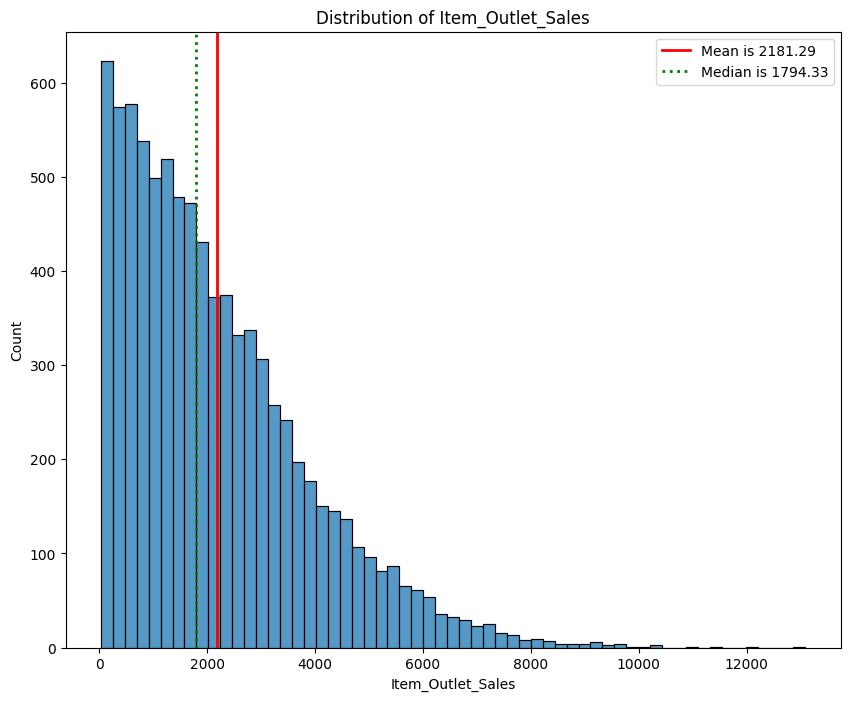

In [ ]:
# plot the histogram for Item_Outlet_Sales_Year feature
fig, ax= annotated_hist(df_sales, 'Item_Outlet_Sales')

## comment on the plot:

In [ ]:
def boxen_plt(df,col):
  fig, ax = plt.subplots(figsize=(10,8), ncols=2 )
  sns.boxplot(data=df,y= col , color= "red",ax=ax[0])
  ax[0].set_title(f'boxplot for {col} ')
  sns.boxenplot(data=df ,y  = col ,color = 'red',ax=ax[1])
  ax[1].set_title(f'boxenplot for {col} ')
  fig.suptitle("box & boxen plts")

  return fig, ax




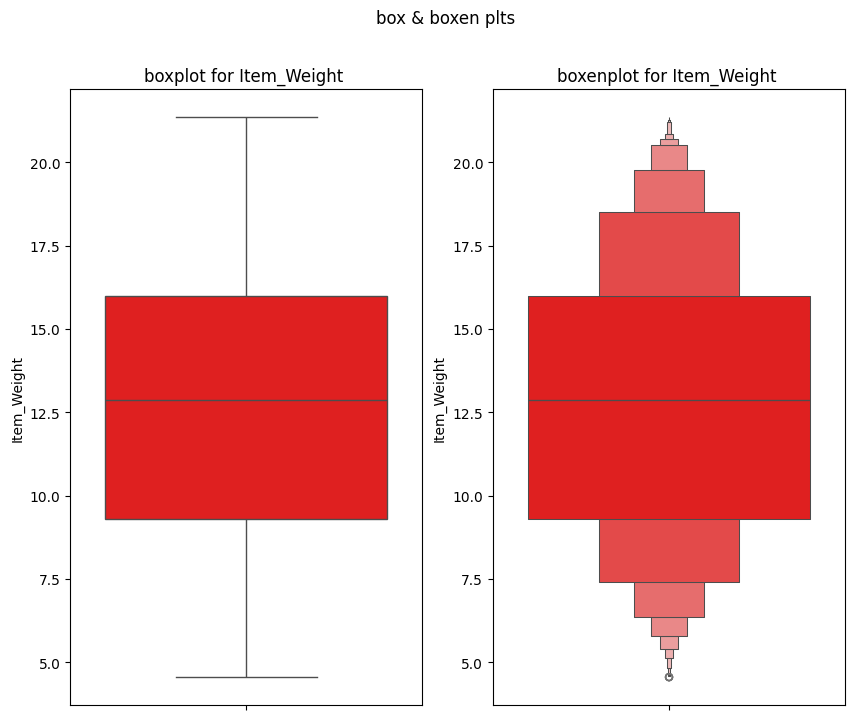

In [ ]:
fig, ax = boxen_plt(df_sales,'Item_Weight' )


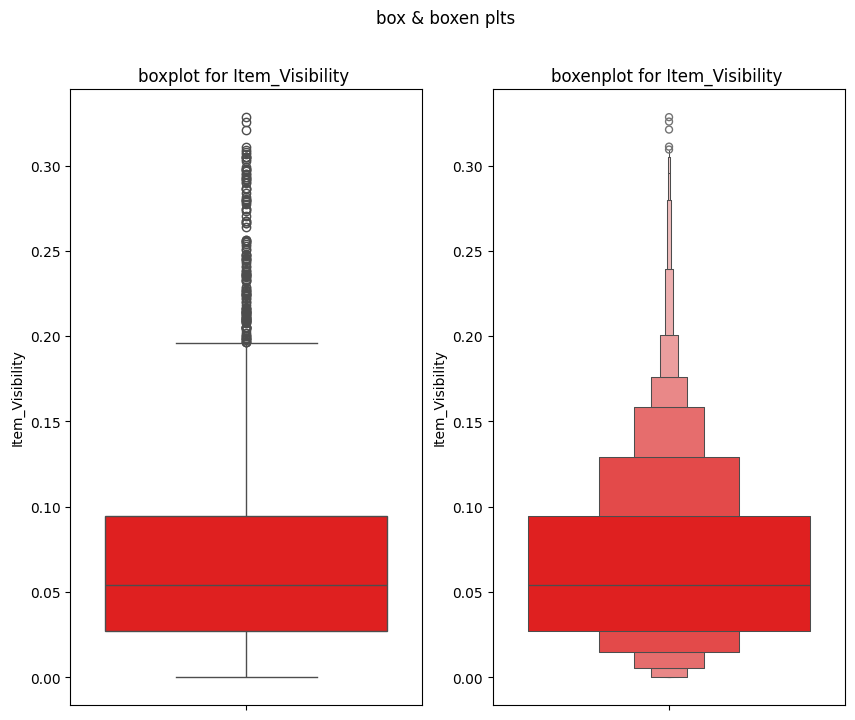

In [ ]:
fig, ax = boxen_plt(df_sales,'Item_Visibility' )

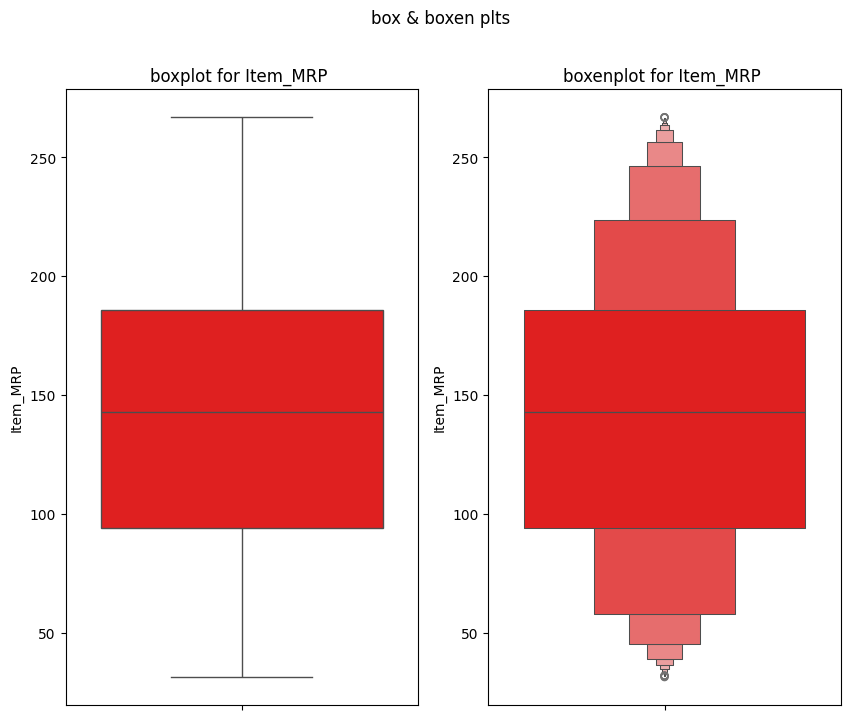

In [ ]:
fig, ax = boxen_plt(df_sales,'Item_MRP' )

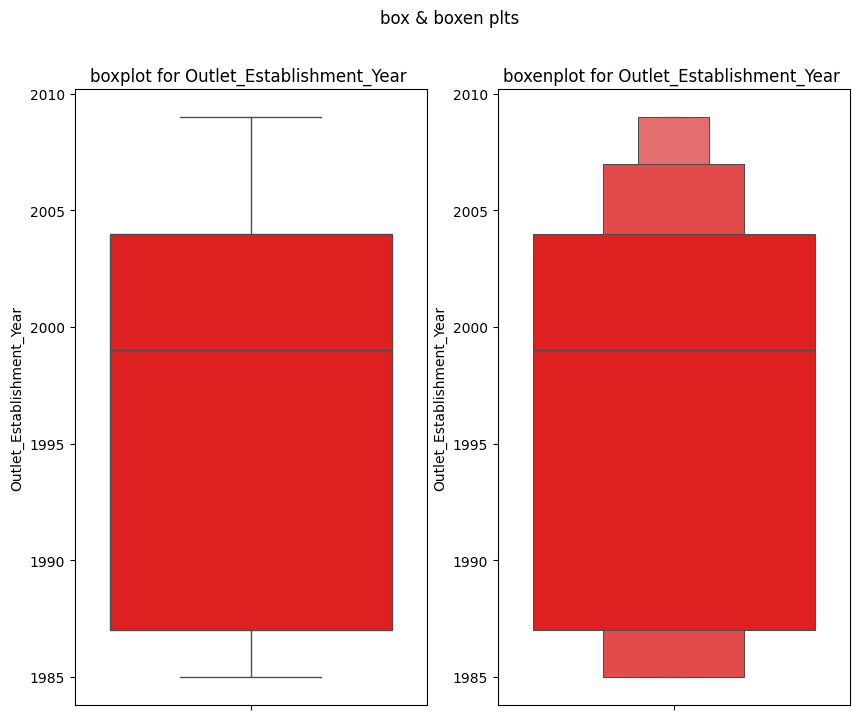

In [ ]:
fig, ax = boxen_plt(df_sales,'Outlet_Establishment_Year' )

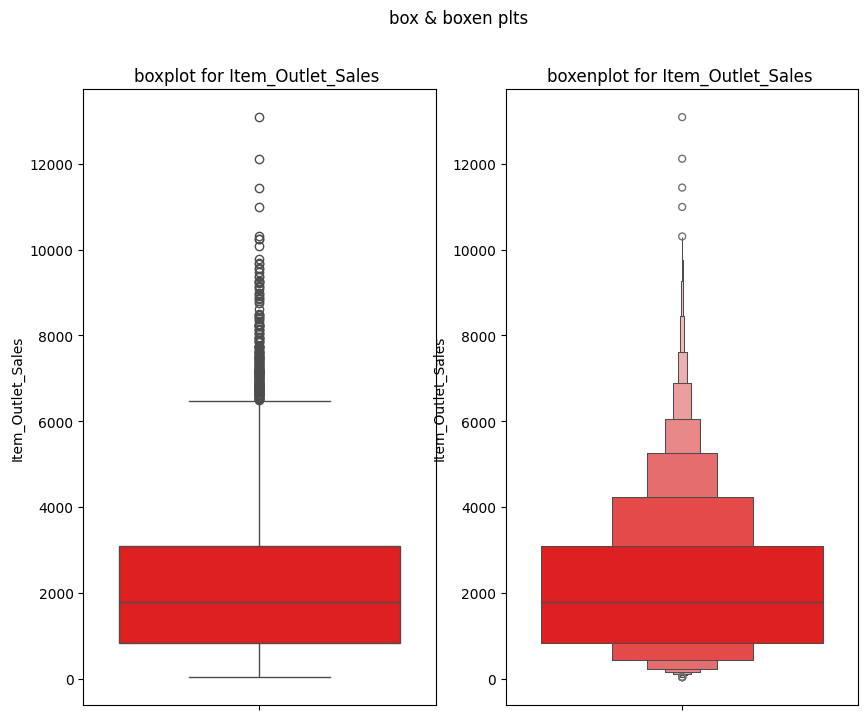

In [ ]:
fig, ax = boxen_plt(df_sales,'Item_Outlet_Sales' )

In [ ]:
def count_plt(df,col):
  fig, ax = plt.subplots(figsize=(10,8))
  ax=sns.countplot(data=df,x=col, color = 'green')
  ax.set_title(f"plot of {col}")
  ax.tick_params(axis='x', rotation = 90)
  return fig, ax

In [ ]:
str_cols

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


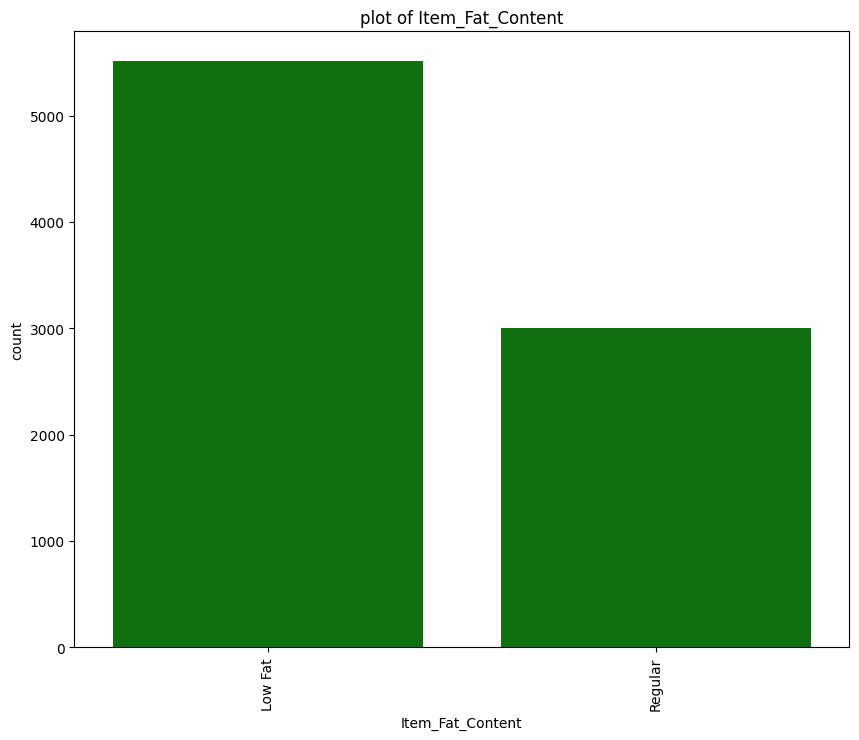

In [ ]:
fig, ax = count_plt(df_sales,'Item_Fat_Content')


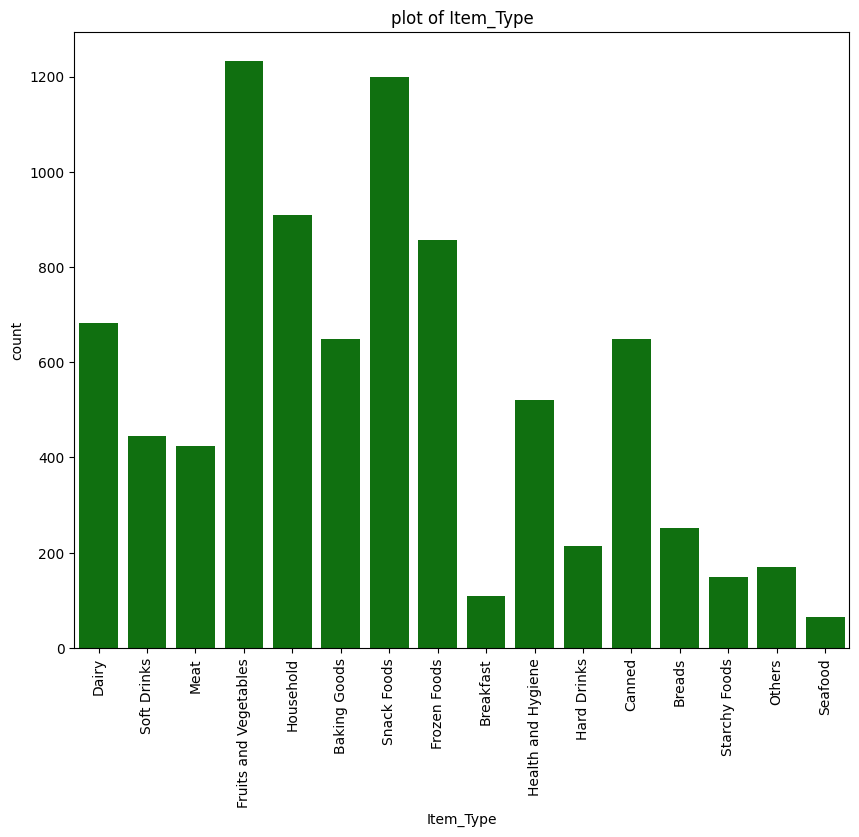

In [ ]:
fig, ax = count_plt(df_sales,'Item_Type')

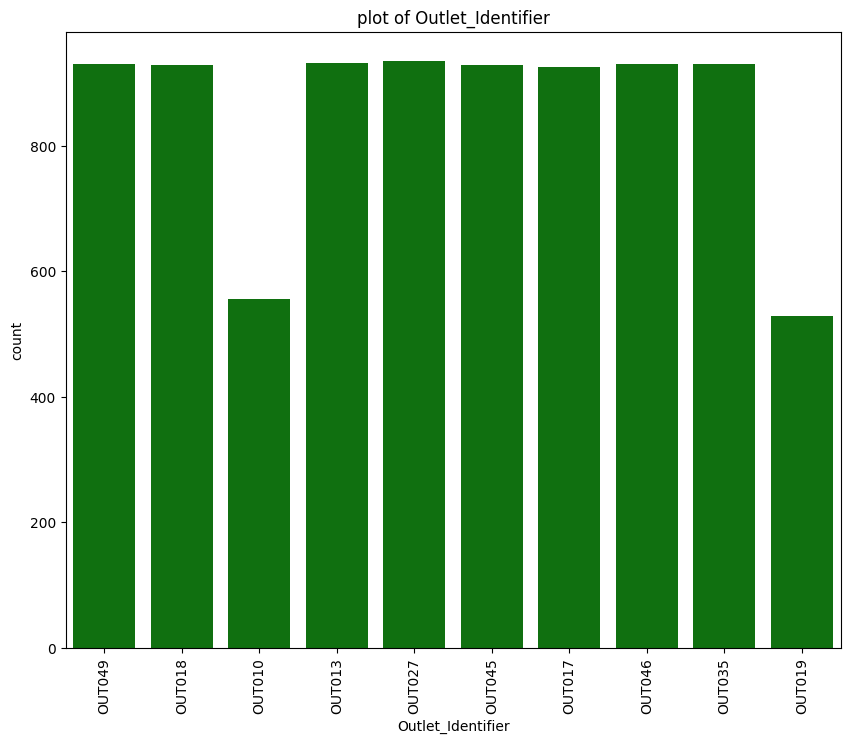

In [ ]:
fig, ax = count_plt(df_sales,'Outlet_Identifier')

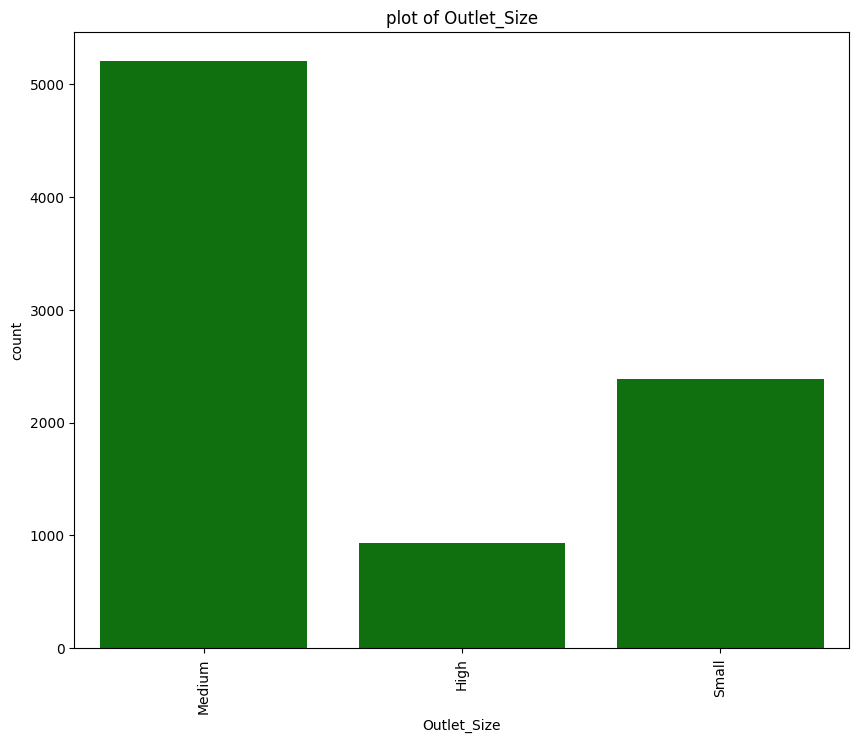

In [ ]:
fig, ax = count_plt(df_sales,'Outlet_Size')

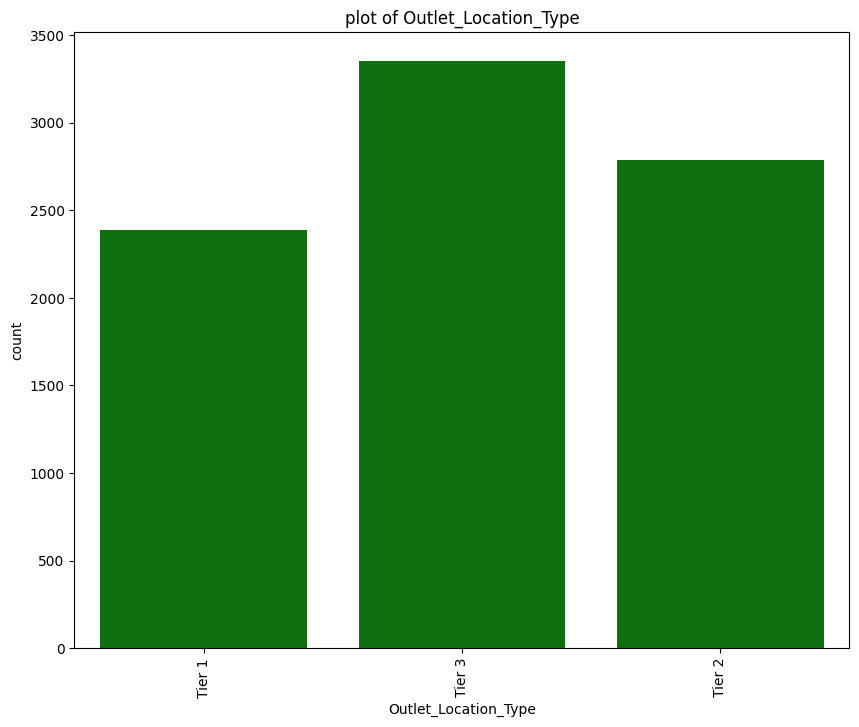

In [ ]:
fig, ax = count_plt(df_sales,'Outlet_Location_Type')

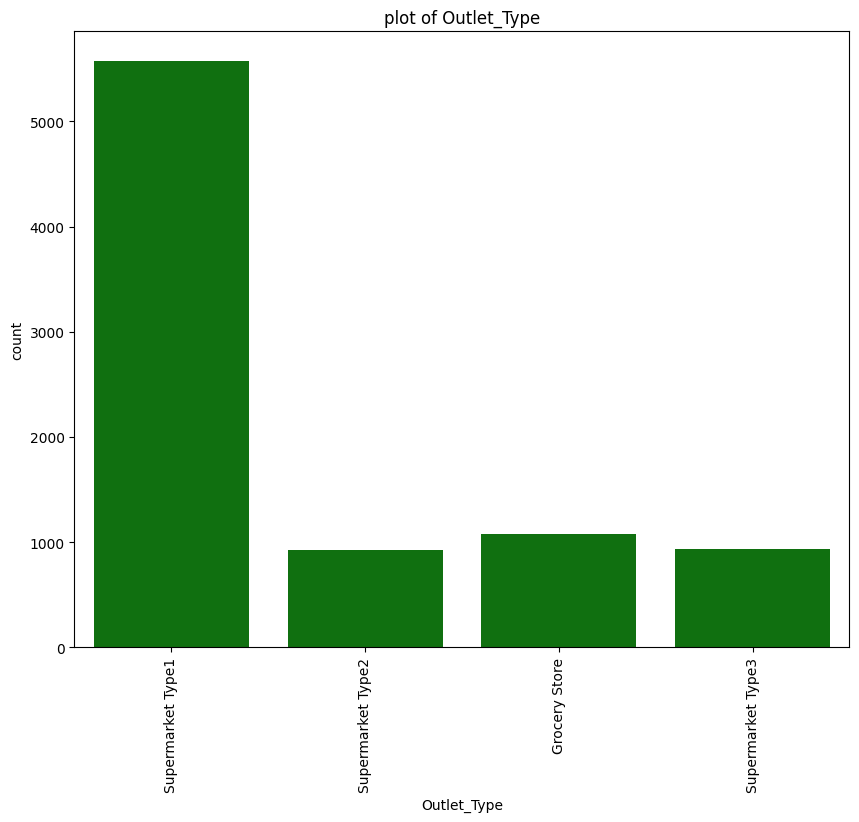

In [ ]:
fig, ax = count_plt(df_sales,'Outlet_Type')

In [ ]:
str_cols = df_sales.select_dtypes('object')
str_cols = str_cols.drop(columns=['Item_Identifier'])

In [ ]:
corr=df_sales.corr(numeric_only = True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


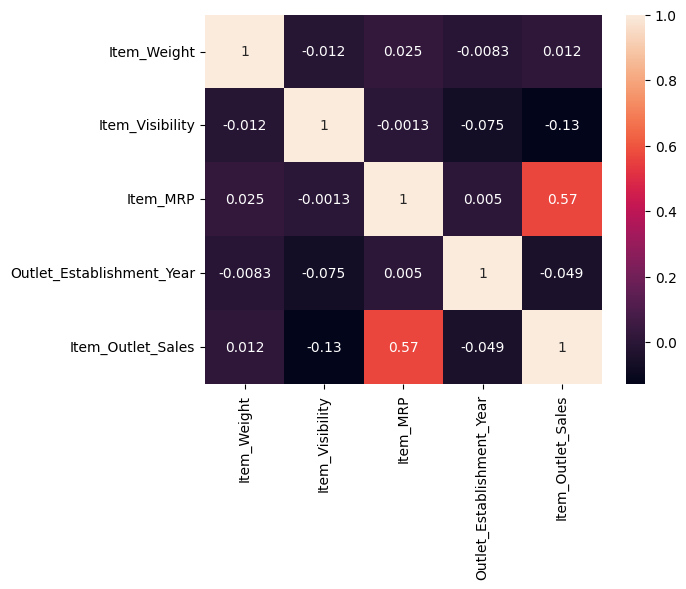

In [ ]:
ax=sns.heatmap(corr,annot=True)

## Feature Inspection 🛠️👀